# Describing, visualising, and transforming data

## 1. Descriptive statistics

### Pima Indians Dataset

The Pima Indians dataset is used again to demonstrate descriptive statistics in this lab. To recap, this dataset describes the medical records for Pima Indians and whether or not each patient will have an onset of diabetes within five years. As such it is a classification problem, where input attributes are numeric and the output variable to be predicted is binary (0 or 1). 

The list below shows the eight attributes for the dataset as a reminder: 

1. Number of times pregnant.
2. Plasma glucose concentration 2 hours in an oral glucose tolerance test. 
3. Diastolic blood pressure (mm Hg).
4. Triceps skin fold thickness (mm).
5. 2-Hour serum insulin (mu U/ml).
6. Body mass index (BMI).
7. Diabetes pedigree function.
8. Age (years).
9. Class, onset of diabetes within five years.

We will load the dataset and take a closer look at the data we have at hand.

In [9]:
import matplotlib.pyplot as pyplot
import pandas as pd
import numpy as np

filename = './data/pima-indians-diabetes.data.csv'
header = ['Pregnancy_Count','Glucone_conc','Blood_pressure','Skin_thickness','Insulin','BMI','DPF','Age','Class']

data = pd.read_csv(filename, names=header)
print(data.shape)

data.head()
#data.tail()

(768, 9)


,Pregnancy_Count,Glucone_conc,Blood_pressure,Skin_thickness,Insulin,BMI,DPF,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Descriptive statistics can give you great insight into the shape of each attribute. Often you can create more summaries than you have time to review. The `describe()` function on the `Pandas.DataFrame` object lists 8 statistical properties for each attribute. They are:
- Count.
- Mean.
- Standard Deviation.
- Minimum Value.
- 25th Percentile.
- 50th Percentile (Median). 
- 75th Percentile.
- Maximum Value

### Statistical Summary

In [10]:
pd.set_option('display.width', 100)
#pd.set_option('precision', 3)
pd.set_option('display.precision',3)


description = data.describe()

description

,Pregnancy_Count,Glucone_conc,Blood_pressure,Skin_thickness,Insulin,BMI,DPF,Age,Class
count,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000
mean,3.845,120.895,69.105,20.536,79.799,31.993,0.472,33.241,0.349
std,3.370,31.973,19.356,15.952,115.244,7.884,0.331,11.760,0.477
min,0.000,0.000,0.000,0.000,0.000,0.000,0.078,21.000,0.000
25%,1.000,99.000,62.000,0.000,0.000,27.300,0.244,24.000,0.000
50%,3.000,117.000,72.000,23.000,30.500,32.000,0.372,29.000,0.000
75%,6.000,140.250,80.000,32.000,127.250,36.600,0.626,41.000,1.000
max,17.000,199.000,122.000,99.000,846.000,67.100,2.420,81.000,1.000


You can see that you do get a lot of data. You will note some calls to `pandas.set_option()` in the recipe to change the precision of the numbers and the preferred width of the output. This is to make it more readable for this example. When describing your data this way, it is worth taking some time and reviewing observations from the results. This might include the presence of *NA* values for missing data or surprising distributions for attributes.

For more information on `pandas.set_option()` please see the <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.set_option.html">API documentation</a>


### Class Distribution (Classification only)
On classification problems you need to know how balanced the class values are. Highly imbalanced problems (a lot more observations for one class than another) are common and may need special handling in the data preparation stage of your project. 

You can quickly get an idea of the distribution of the class attribute in Pandas as follows:

In [11]:
class_counts = data.groupby('Class').size()
print(class_counts)

Class
0    500
1    268
dtype: int64


You can see that there are nearly double the number of observations with class 0 (no onset of 
diabetes) than there are with class 1 (onset of diabetes).

### Correlations between Attributes

Correlation refers to the relationship between two variables and how they may or may not change together. The most common method for calculating correlation is *Pearson’s Correlation Coefficient*, which assumes a normal distribution of the attributes involved. A correlation of -1 or 1 shows a full negative or positive correlation respectively. Whereas a value of 0 shows no correlation at all. 

Some machine learning algorithms like linear and logistic regression can suffer poor performance if there are highly correlated attributes in your dataset. As such, it is a good idea to review all of the pairwise correlations of the attributes in your dataset. You can use the `corr()` function on the Pandas `DataFrame` (a multi-dimensional array where the rows and the columns 
can be labelled) to calculate a correlation matrix.

In [12]:
correlations = data.corr(method='pearson')

correlations

,Pregnancy_Count,Glucone_conc,Blood_pressure,Skin_thickness,Insulin,BMI,DPF,Age,Class
Pregnancy_Count,1.000,0.129,0.141,-0.082,-0.074,0.018,-0.034,0.544,0.222
Glucone_conc,0.129,1.000,0.153,0.057,0.331,0.221,0.137,0.264,0.467
Blood_pressure,0.141,0.153,1.000,0.207,0.089,0.282,0.041,0.240,0.065
Skin_thickness,-0.082,0.057,0.207,1.000,0.437,0.393,0.184,-0.114,0.075
Insulin,-0.074,0.331,0.089,0.437,1.000,0.198,0.185,-0.042,0.131
BMI,0.018,0.221,0.282,0.393,0.198,1.000,0.141,0.036,0.293
DPF,-0.034,0.137,0.041,0.184,0.185,0.141,1.000,0.034,0.174
Age,0.544,0.264,0.240,-0.114,-0.042,0.036,0.034,1.000,0.238
Class,0.222,0.467,0.065,0.075,0.131,0.293,0.174,0.238,1.000


The matrix lists all attributes across the top and down the side, to give correlation between all pairs 
of attributes (twice, because the matrix is symmetrical). You can see the diagonal line through the 
matrix from the top left to bottom right corners of the matrix shows perfect correlation of each 
attribute with itself.

### Skew of Univariate Distributions

Skew refers to a distribution that is assumed Gaussian (normal or bell curve) that is shifted or 
squashed in one direction or another. Many machine learning algorithms assume a Gaussian 
distribution. Knowing that an attribute has a skew may allow you to perform data preparation to 
correct the skew and later improve the accuracy of your models. You can calculate the skew of each 
attribute using the `skew()` function on the Pandas `DataFrame`.

In [13]:
skew = data.skew()

skew

Pregnancy_Count    0.902
Glucone_conc       0.174
Blood_pressure    -1.844
Skin_thickness     0.109
Insulin            2.272
BMI               -0.429
DPF                1.920
Age                1.130
Class              0.635
dtype: float64

The skew result show a positive (right) or negative (left) skew. Values closer to zero show less 
skew.

# 2. Visualisation 

You must understand your data in order to get the best results from machine learning algorithms. 

The fastest way to learn more about your data is to use data visualisation. In this lab you will discover exactly how you can visualise your machine learning data in Python using Pandas. We will continue to use the Pima Indians onset of diabetes dataset introduced in the previous lab. 

## 2.1 Univariate Plots

We will look at three techniques that you can use to understand each attribute of your dataset independently.

- Histograms
- Density Plots
- Box and Whisker Plots

### Histograms. 

A fast way to get an idea of the distribution of each attribute is to look at histograms. Histograms group data into bins and provide you a count of the number of observations in each bin. From the shape of the bins you can quickly get a feeling for whether an attribute is Gaussian, skewed or even has an exponential distribution. It can also help you see possible outliers.

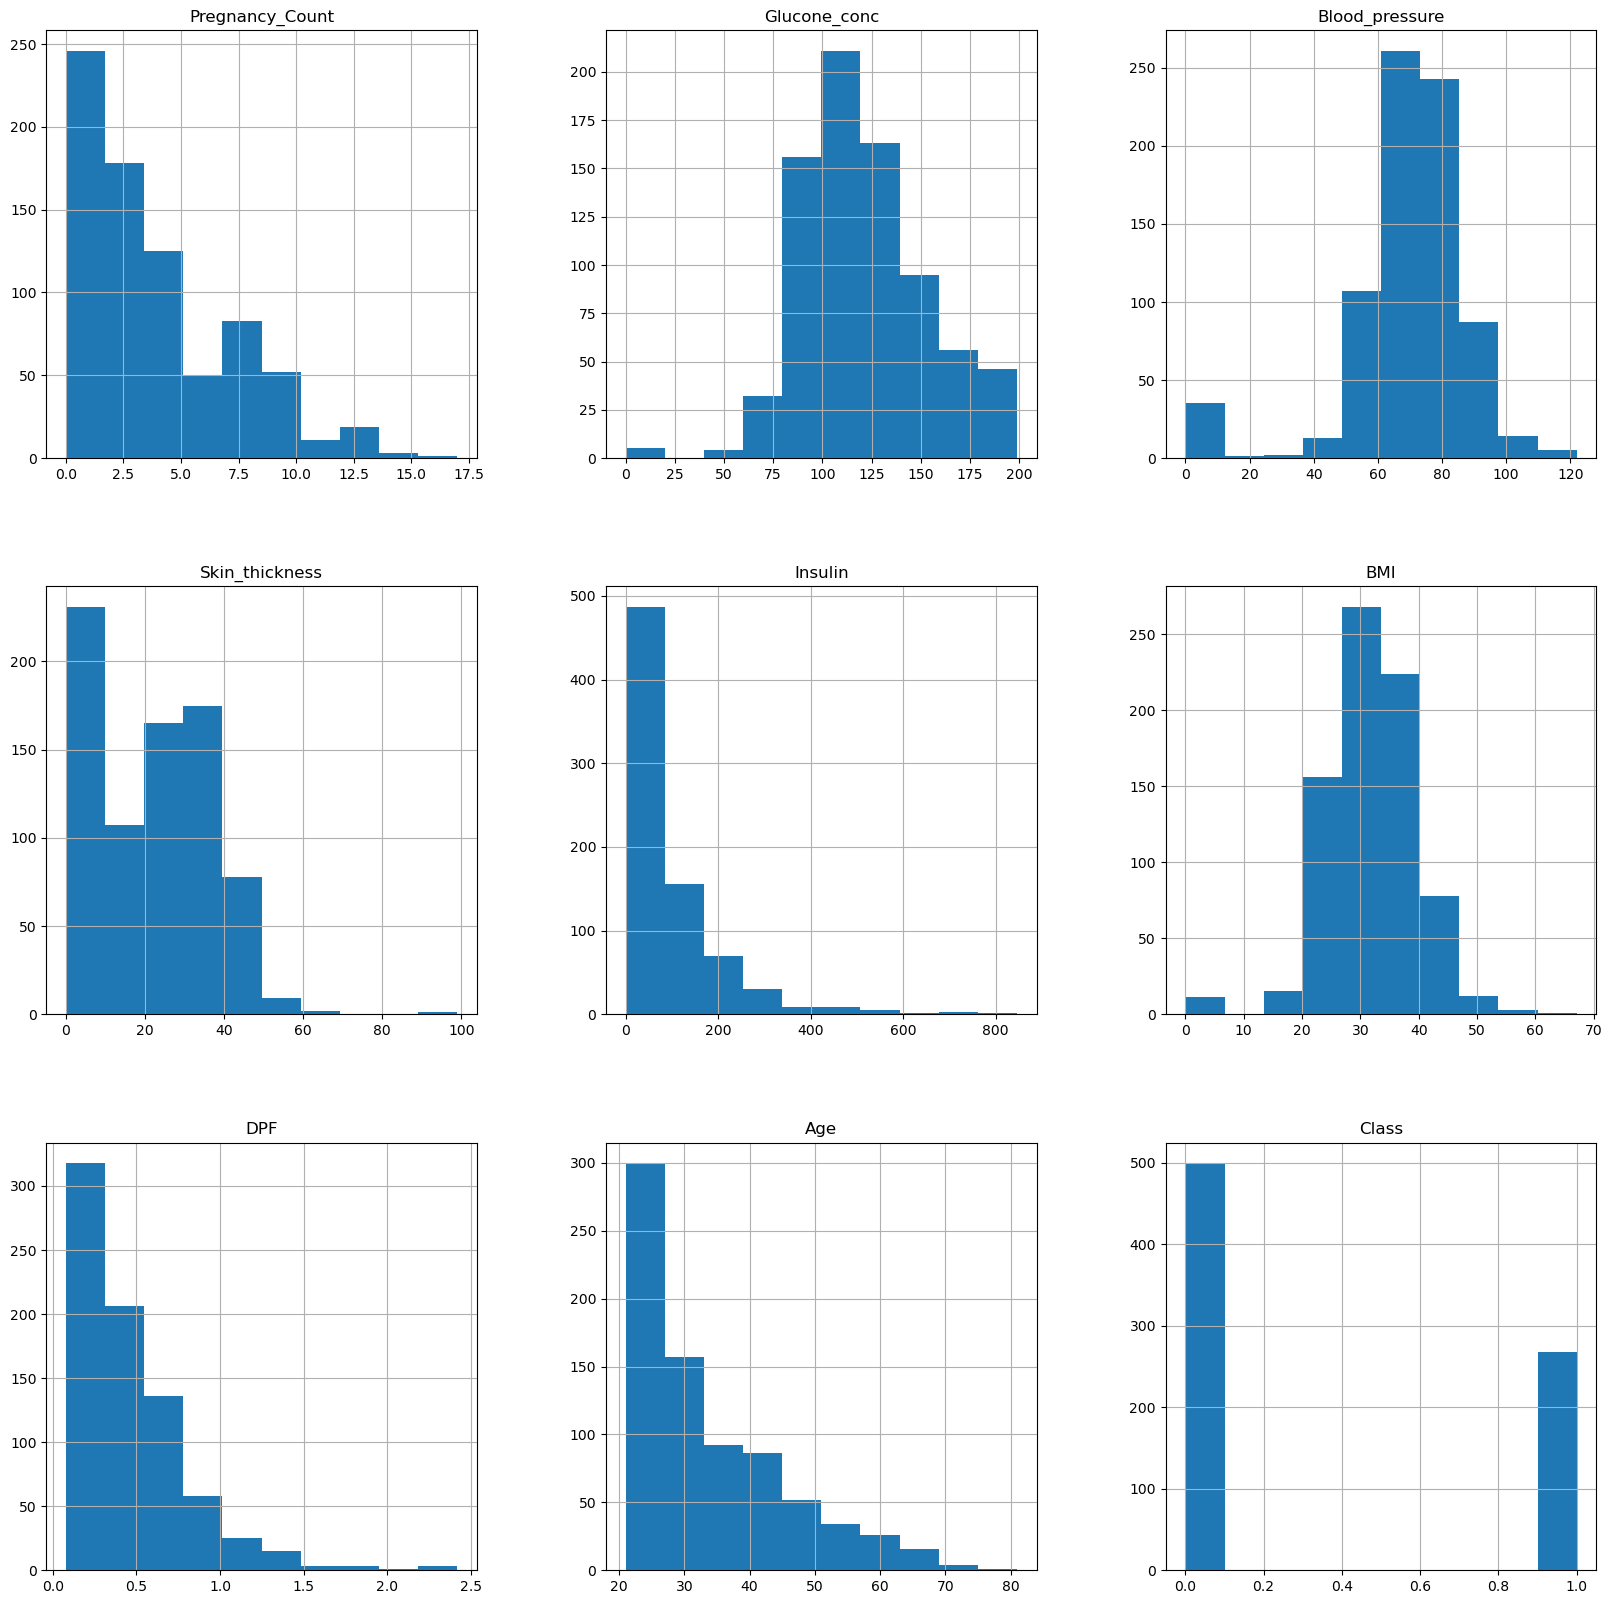

In [14]:
# Univariate Histograms
data.hist(figsize=[20, 20])
pyplot.show()

### Density Plots. 

Density plots are another way of getting a quick idea of the distribution of each attribute. The plots look like an abstracted histogram with a smooth curve drawn through the top of each bin, much like your eye tried to do with the histograms.


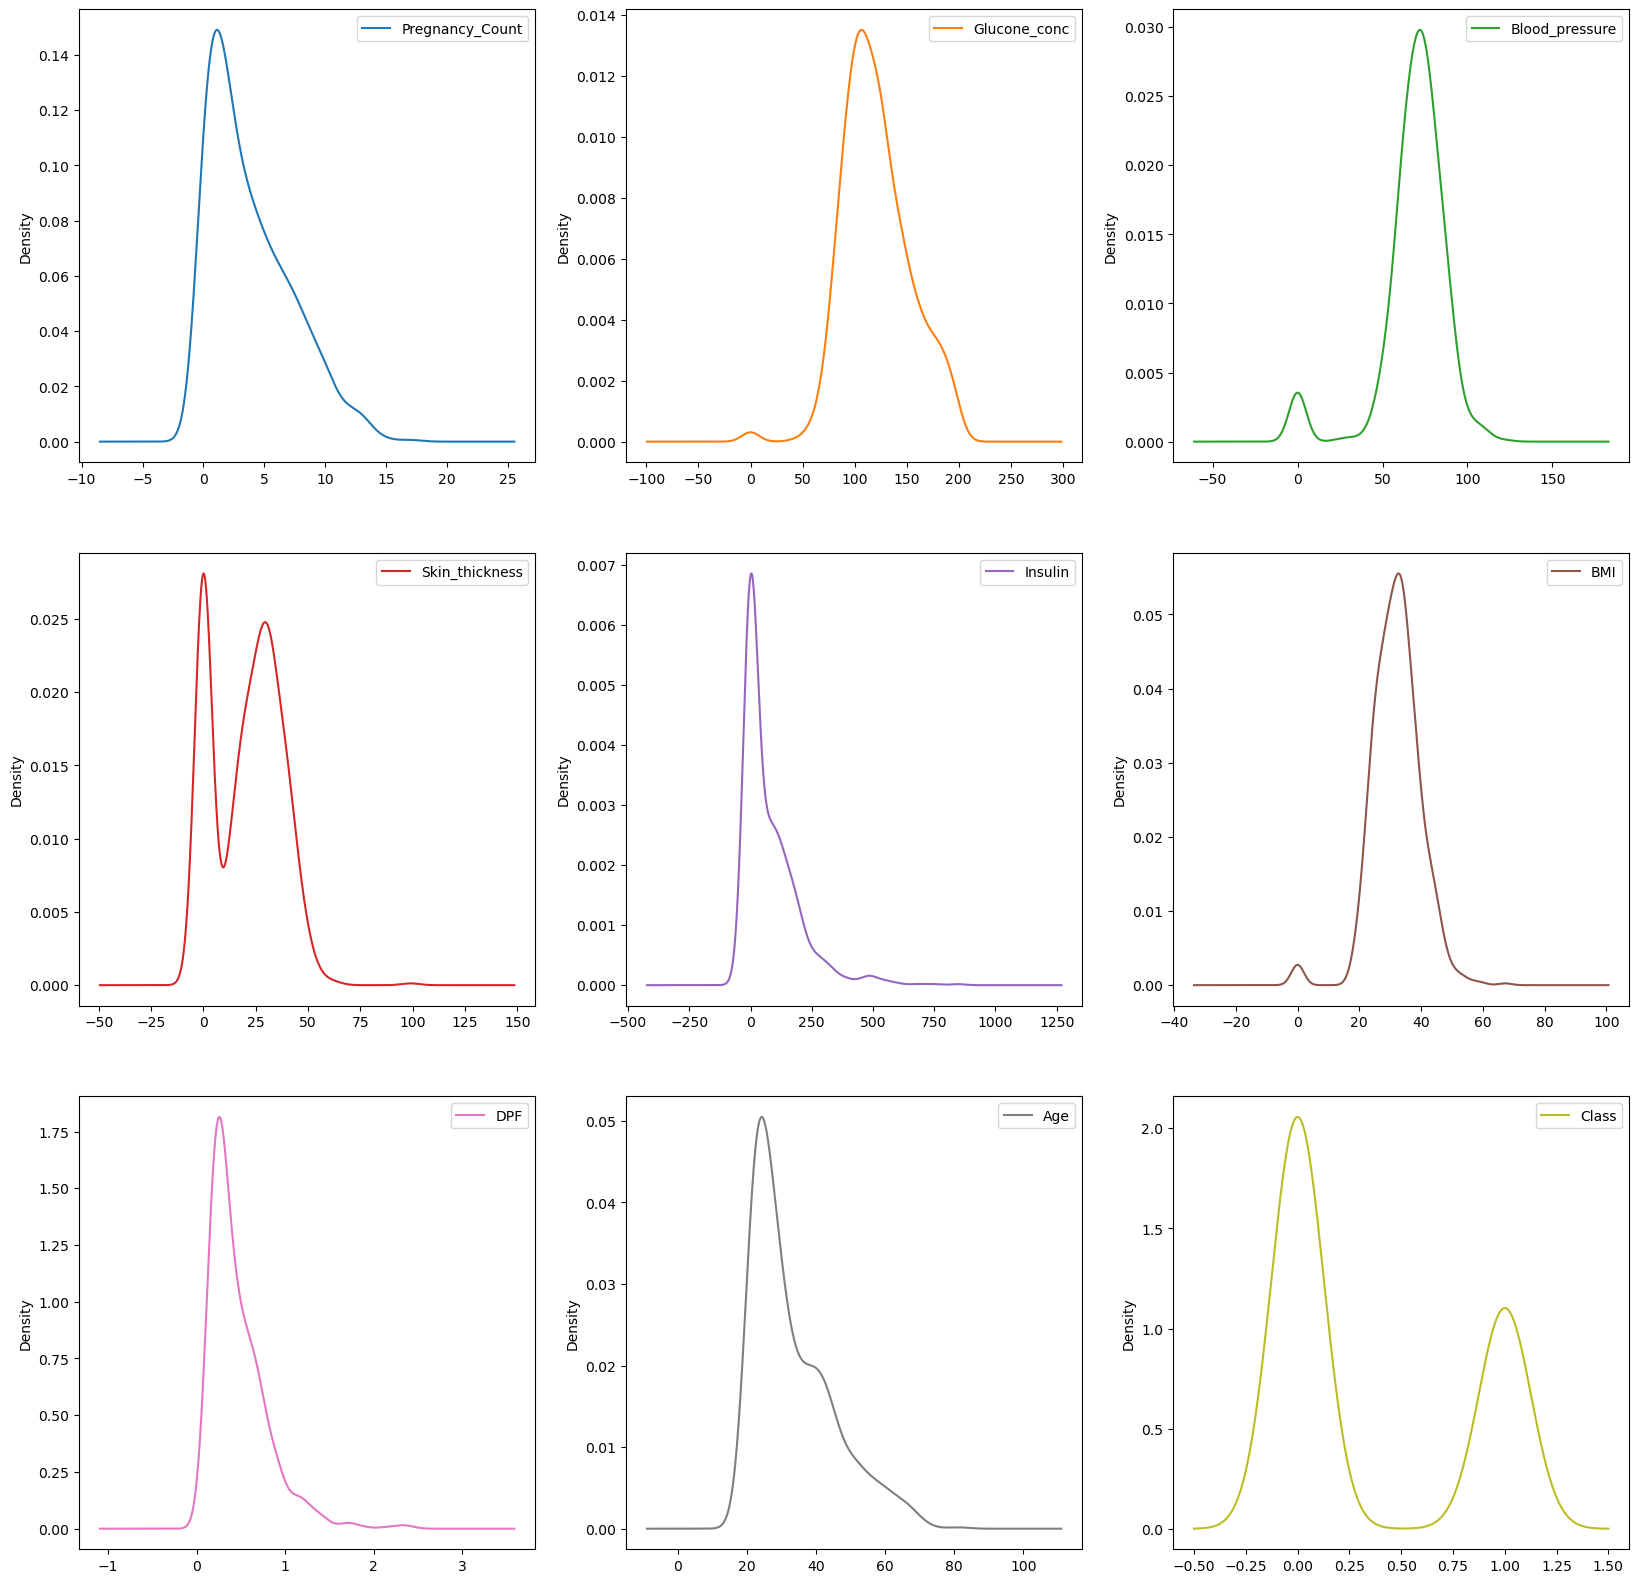

In [15]:
# Univariate Density Plots
data.plot(kind='density', subplots=True, layout=(3,3), sharex=False, figsize=[20, 20]) 
pyplot.show()

After running the above code block and you will be able to see the distribution for each attribute is clearer 
than the histograms.

More details on ```pandas.DataFrame.plot``` function are available in the <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html">API documentation</a>. 


### Box and Whisker Plots. 

Another useful way to review the distribution of each attribute is to use Box and Whisker Plots or boxplots for short. Boxplots summarise the distribution of each attribute, drawing a line for the median (middle value) and a box around the 25th and 75th percentiles (the middle 50% of the data). 

The whiskers give an idea of the spread of the data and dots outside of the whiskers show candidate outlier values (values that are 1.5 times greater than the size of spread of the middle 50% of the data).

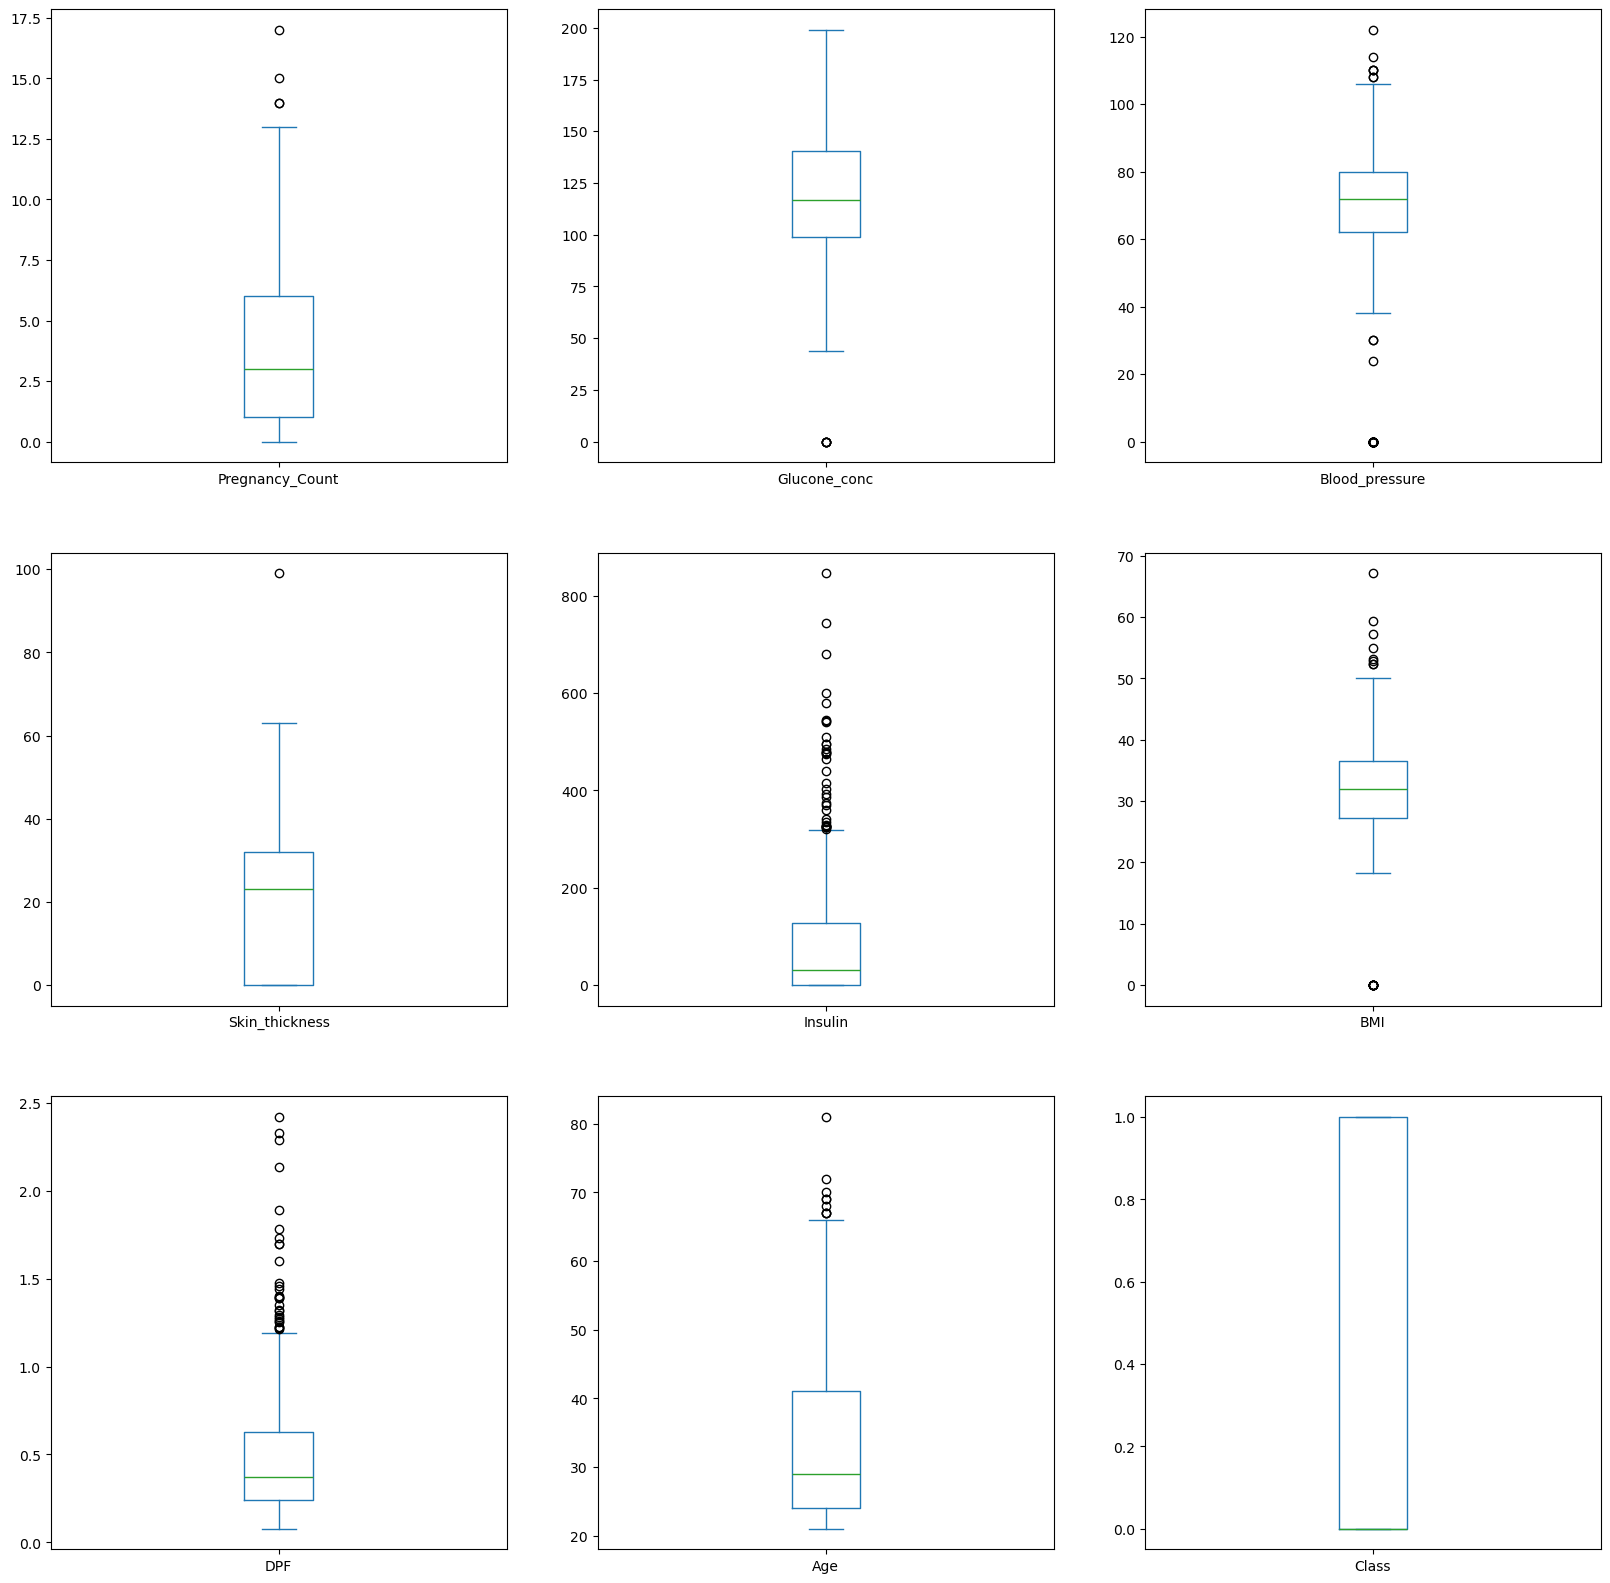

In [16]:
# Box and Whisker Plots
data.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False,figsize=[20, 20]) 
pyplot.show()

After running the above code block and you will be able to see that	the	spread of attributes is	quite different. Some like age, test and skin appear quite skewed towards smaller values.	

## 2.2 Multivariate Plots
We will look at the examples of two plots that show the interactions between multiple variables in your dataset.

- Correlation Matrix Plot.
- Scatter Plot Matrix.

### Correlation Matrix Plot. 

Correlation gives an indication of how related the changes are between two variables. If two variables change in the same direction they are positively correlated. If they 
change in opposite directions together (one goes up, one goes down), then they are negatively correlated. You can calculate the correlation between each pair of attributes. This is called a 
correlation matrix. You can then plot the correlation matrix and get an idea of which variables have a high correlation with each other. This is useful to know, because some machine learning 
algorithms like linear and logistic regression can have poor performance if there are highly correlated input variables in your data.

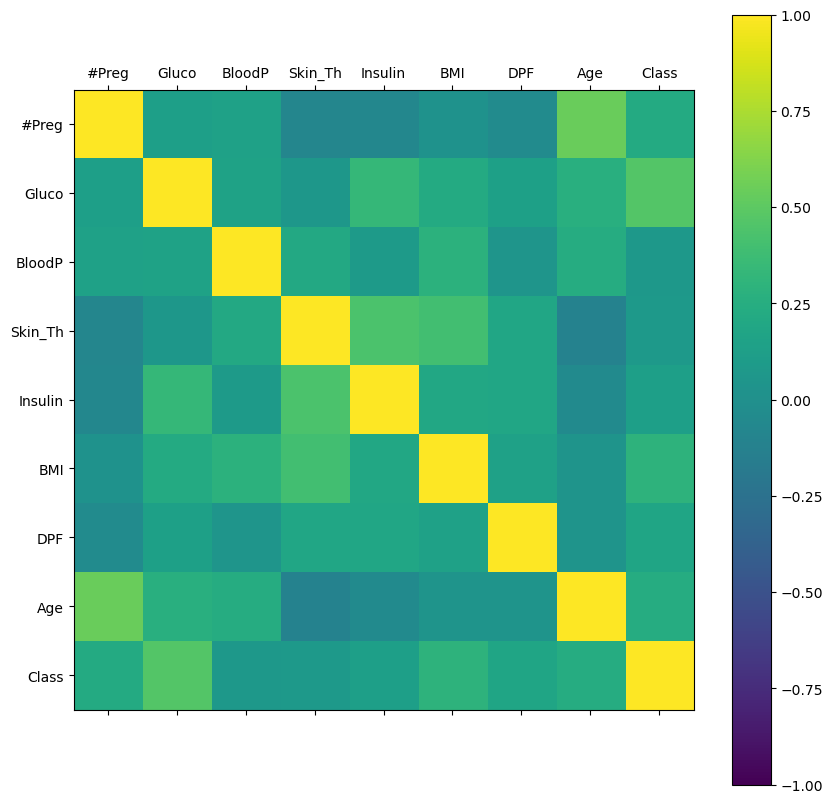

In [17]:
# Correlation Matrix Plot
correlations = data.corr()

# Plot correlation matrix
fig = pyplot.figure(figsize=[10, 10])
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)

ticks = np.arange(0,9,1)

ax.set_xticks(ticks)
ax.set_yticks(ticks)

short_names = ['#Preg','Gluco','BloodP','Skin_Th','Insulin','BMI','DPF','Age','Class']

ax.set_xticklabels(short_names)
ax.set_yticklabels(short_names)
pyplot.show()

Ticks are the values used to show specific points on the coordinate axis. It can be a number or a string. Whenever we plot a graph, the axes adjust and take the default ticks. Matplotlib’s default ticks are generally sufficient in common situations but are in no way optimal for every plot.

Run the above code block and you will be able to see that the matrix is symmetrical, i.e. the bottom left of the matrix is the same as the top right. This is useful as we can see two different views on the same data in one plot. We can also see that each variable is perfectly positively correlated with each other (as you would have expected) in the diagonal line from top left to bottom right.

The above example is not generic in that it specifies the names for the attributes along the axes as well as the number of ticks. We can make the plot more generic by removing the names like the one below:

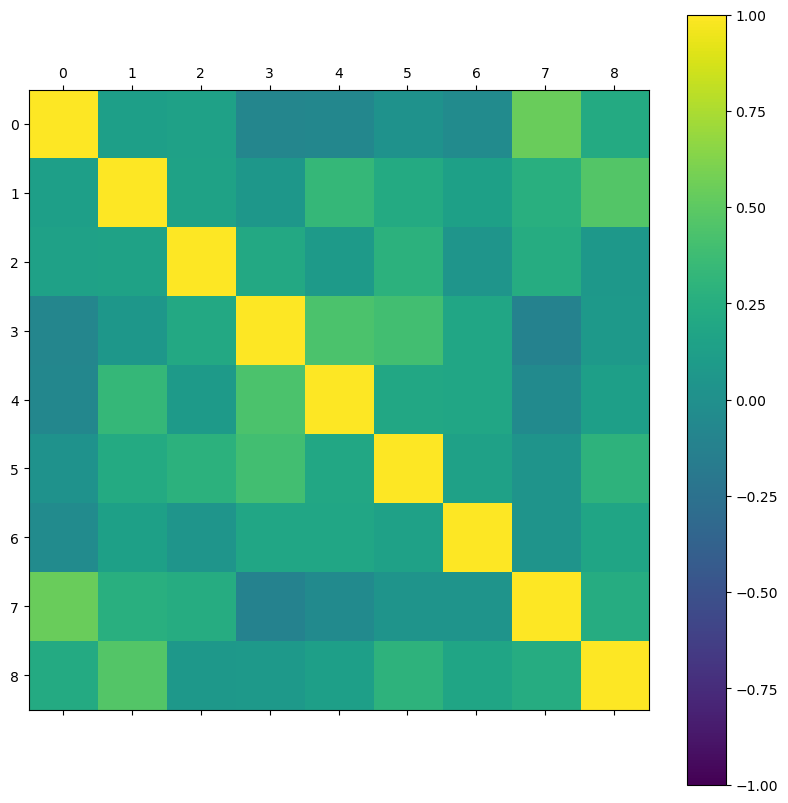

In [18]:
# Correlation Matrix Plot (generic)

# Plot correlation matrix
fig = pyplot.figure(figsize=[10, 10])

ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)

pyplot.show()

Generating the plot, you can see that it gives the same information although making it a little harder to see what attributes are correlated by name. Use this generic plot as a first cut to understand the 
correlations in your dataset and customise it like the first example in order to read off more specific data if needed.

### Scatter Plot Matrix. 

A scatter plot shows the relationship between two variables as dots in two dimensions, one axis for each attribute. You can create a scatter plot for each pair of attributes in your data. 

Drawing all these scatter plots together is called a scatter plot matrix. Scatter plots are useful for spotting structured relationships between variables, like whether you could summarise the relationship between two variables with a line. Attributes with structured relationships may also be correlated and good candidates for removal from your dataset.

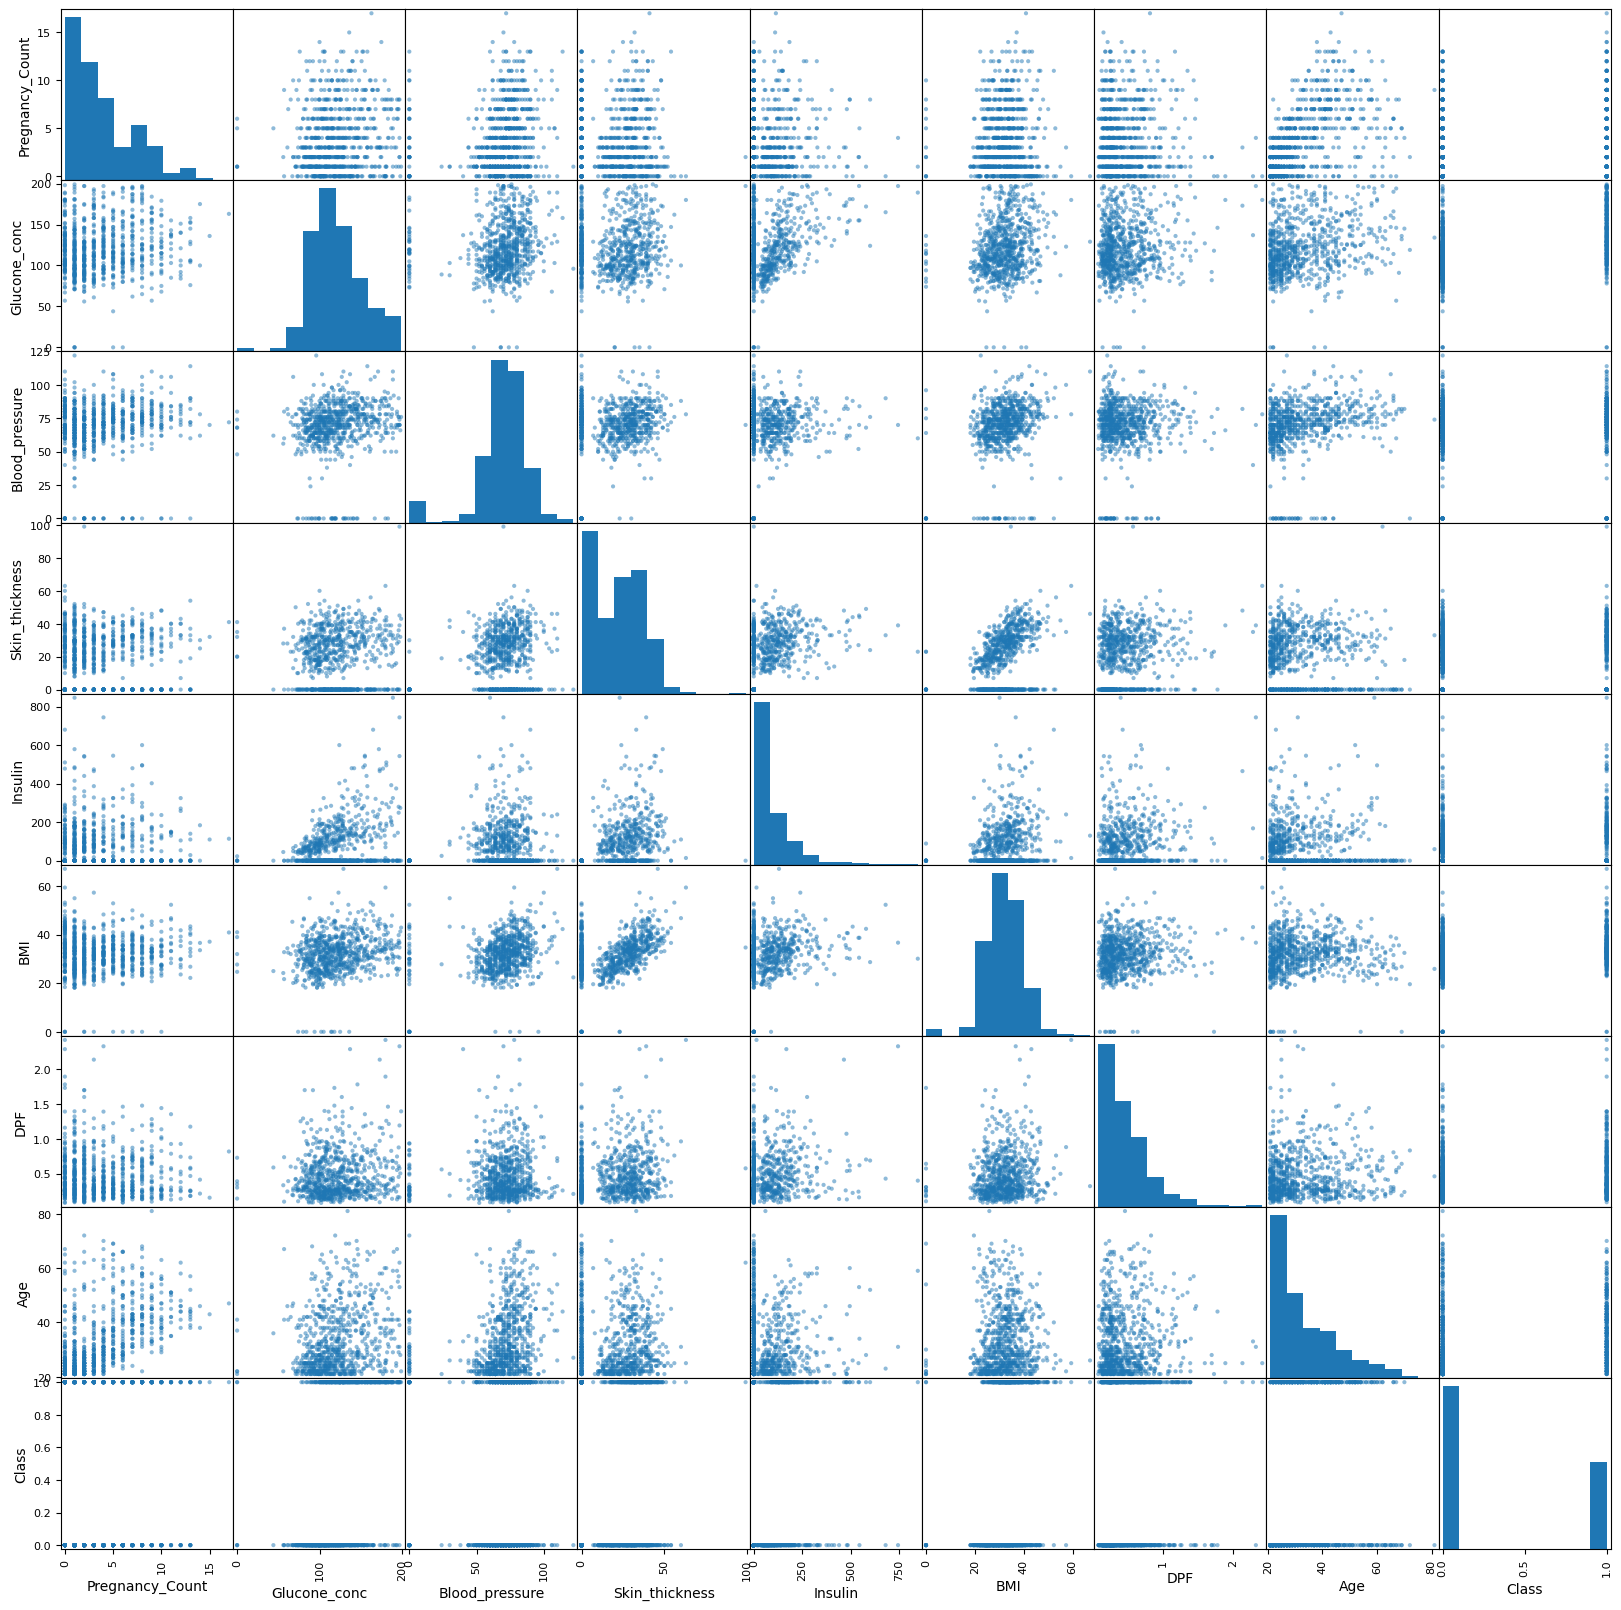

In [19]:
# Scatterplot Matrix using Pandas

pd.plotting.scatter_matrix(data, figsize=[20, 20])

pyplot.show()

Like the Correlation Matrix Plot above, the scatter plot matrix is symmetrical. This is useful to look at the pairwise relationships from different perspectives. Because there is little point of drawing a scatter plot of each variable with itself, the diagonal shows histograms of each attribute.

# 3. Data preparation

You almost always need to pre-process your data. It is a required step. A difficulty is that different algorithms make different assumptions about your data and may require different transforms. 
Furthermore, when you follow all of the rules and prepare your data, sometimes algorithms can deliver better results without pre-processing.

Generally, I would recommend creating many different views and transforms of your data, then exercise a handful of algorithms on each view of your dataset. This will help you to flush out which data transforms might be better at exposing the structure of your problem in general.

## Data Transforms

The scikit-learn library provides two standard idioms for transforming data. Each are useful in different circumstances. The transforms are calculated in such a way that they can be applied to 
your training data and any samples of data you may have in the future. The scikit-learn documentation has some information on how to use various different pre-processing methods:

- Fit and Multiple Transform.
- Combined Fit-And-Transform.


The Fit and Multiple Transform method is the preferred approach. You call the ```fit()``` function to prepare the parameters of the transform once on your data. Then later you can use the ```transform()``` function on the same data to prepare it for modelling and again on the test or validation dataset or new data that you may see in the future. The Combined Fit-And-Transform is a convenience that you can use for one off tasks. 

This might be useful if you are interested in plotting or summarising the transformed data. You can review the preprocessing <a href="https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing">API documentation</a> for more information.


## Rescale Data

When your data is comprised of attributes with varying scales, many machine learning algorithms can benefit from rescaling the attributes to all have the same scale. Often this is referred to as normalisation and attributes are often rescaled into the range between 0 and 1. 

This is useful for optimisation algorithms used in the core of machine learning algorithms like gradient descent (more on this later). 

It is also useful for algorithms that weight inputs like regression and neural networks and algorithms that use distance measures like k-Nearest Neighbors (again we will discuss these in more detail). You can rescale your data with scikit-learn using the ```MinMaxScaler``` class. 

More details are available in the <a href="http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html">API documentation</a>.


In [20]:
# Prepare the data for rescaling and some of the other transforms we will perform later.

# We have loaded the data previously, so now we extract the values from the Pandas dataframe we set up at the beginning.
array = data.values

# separate array into input and output components
X = array[:,0:8]
Y = array[:,8]

print(array)



[[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]


In [21]:
# Rescale data (between 0 and 1)
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)

# summarise transformed data
set_printoptions(precision=3)

rescaledX

array([[0.353, 0.744, 0.59 , ..., 0.501, 0.234, 0.483],
       [0.059, 0.427, 0.541, ..., 0.396, 0.117, 0.167],
       [0.471, 0.92 , 0.525, ..., 0.347, 0.254, 0.183],
       ...,
       [0.294, 0.608, 0.59 , ..., 0.39 , 0.071, 0.15 ],
       [0.059, 0.633, 0.492, ..., 0.449, 0.116, 0.433],
       [0.059, 0.467, 0.574, ..., 0.453, 0.101, 0.033]])

Run the above code block and you should be able to see that all of the values are in the range 
between 0 and 1.

## Standardise Data. 

Standardisation is a useful technique to transform attributes with a Gaussian distribution and differing means and standard deviations to a standard Gaussian distribution with a 
mean of 0 and a standard deviation of 1. 

It is most suitable for techniques that assume a Gaussian distribution in the input variables and work better with rescaled data, such as linear regression, 
logistic regression and linear discriminate analysis. 

You can standardise data using scikit-learn with the ```StandardScaler``` class. More details are available in the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html">API documentation</a>.

In [22]:
# Standardise data (0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)

# summarise transformed data
set_printoptions(precision=3)
print(rescaledX[0:5,:])


[[ 0.64   0.848  0.15   0.907 -0.693  0.204  0.468  1.426]
 [-0.845 -1.123 -0.161  0.531 -0.693 -0.684 -0.365 -0.191]
 [ 1.234  1.944 -0.264 -1.288 -0.693 -1.103  0.604 -0.106]
 [-0.845 -0.998 -0.161  0.155  0.123 -0.494 -0.921 -1.042]
 [-1.142  0.504 -1.505  0.907  0.766  1.41   5.485 -0.02 ]]


Run the above code block and you will be able to see that the values for each attribute now have a mean value of 0 and a standard deviation of 1. Now if we plot the original data again....

We can check to see what the affect was on our attributes after rescaling

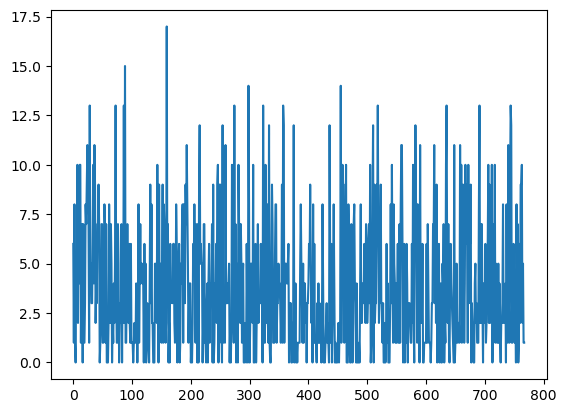

In [23]:
# Original raw data for Pregnancy count
pyplot.plot(data[['Pregnancy_Count']].values)
pyplot.show()

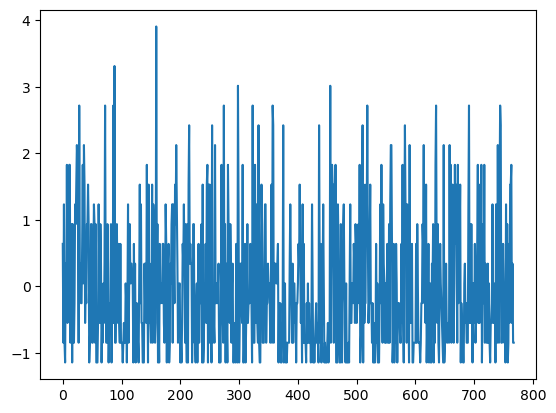

In [24]:
# Rescaled data for Pregnancy count
pyplot.plot(rescaledX[:,0])
pyplot.show()

## Normalise Data

Normalising in scikit-learn refers to rescaling each observation (row) to have a length of 1 (called a unit norm or a vector with the length of 1 in linear algebra). This pre-processing method can be useful for sparse datasets (lots of zeros) with attributes of varying scales when using algorithms that weight input values such as neural networks and algorithms that use 
distance measures such as k-Nearest Neighbors. 

You can normalise data in Python with scikit-learn using the ```Normalizer``` class. Details are available in the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html">API documentation</a>.

In [25]:
from sklearn.preprocessing import Normalizer 
# Normalise data (length of 1)
scaler = Normalizer().fit(X)

normalisedX = scaler.transform(X)

# Summarise transformed data
set_printoptions(precision=3)
print(normalisedX[0:5,:])

[[0.034 0.828 0.403 0.196 0.    0.188 0.004 0.28 ]
 [0.008 0.716 0.556 0.244 0.    0.224 0.003 0.261]
 [0.04  0.924 0.323 0.    0.    0.118 0.003 0.162]
 [0.007 0.588 0.436 0.152 0.622 0.186 0.001 0.139]
 [0.    0.596 0.174 0.152 0.731 0.188 0.01  0.144]]


## Binarise Data

You can transform your data using a binary threshold. All values above the threshold are marked 1 and all equal to or below are marked as 0. This is called binarising your data 
or thresholding your data. It can be useful when you have probabilities that you want to make crisp values. It is also useful when feature engineering and you want to add new features that indicate 
something meaningful. 

You can create new binary attributes in Python using scikit-learn with the ```Binarizer``` class. Details are available in the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Binarizer.html">API documentation</a> 

In [26]:
# binarisation
from sklearn.preprocessing import Binarizer

binariser = Binarizer(threshold=0.0).fit(X)

binaryX = binariser.transform(X)

# summarise transformed data
set_printoptions(precision=3)
print(binaryX[0:5,:])

[[1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 0. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1.]]


Run the above code block and you will be able to see that all values equal or less than 0 are marked 0 and all of those above 0 are marked 1.

# Influence of Data transformation on ML models

Let's see what the effects of data transformation are on a common Machine Learning algorithm - the DecisionTree classifier. Do not worry too much at this stage if you do not understand the code, we are just interested in the accuracy of the model, before and after data transformation:

In [27]:
# Decision tree classification 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Normalise data (length of 1)
from sklearn.preprocessing import Normalizer

scaler = Normalizer().fit(X)
normalisedX = scaler.transform(X)

# summarise transformed data
set_printoptions(precision=3)

print("Normalised Samples \n", normalisedX[0:5,:])

kfold = KFold(n_splits=10)
model = DecisionTreeClassifier()

results1 = cross_val_score(model, X, Y, cv=kfold)
print("\nMean estimated accuracy \n", results1.mean())

# Decision tree classification on normalised data
results2 = cross_val_score(model, normalisedX, Y, cv=kfold)
print("\nMean estimated accuracy on normalised data \n",results2.mean())

Normalised Samples 
 [[0.034 0.828 0.403 0.196 0.    0.188 0.004 0.28 ]
 [0.008 0.716 0.556 0.244 0.    0.224 0.003 0.261]
 [0.04  0.924 0.323 0.    0.    0.118 0.003 0.162]
 [0.007 0.588 0.436 0.152 0.622 0.186 0.001 0.139]
 [0.    0.596 0.174 0.152 0.731 0.188 0.01  0.144]]

Mean estimated accuracy 
 0.6939336978810664

Mean estimated accuracy on normalised data 
 0.6262645249487355


When we initially run our algorithm we achieve a high mean accuracy of 0.69, whereas after we transform and normalise our data we have a much lower, which indicates that transforming and normalising our data had a negative impact on the model performance. In this case, we may try another form of transform or use our data as is.